In [1]:
import pandas
from scipy.io import loadmat
import matplotlib.pyplot as pyplot
import numpy as np
import scipy.optimize as optimize

In [2]:
#Загрузите данные ex3data1.mat из файла.

matData = loadmat('ex3data1.mat')
# print(matData)

x = matData["X"]
y = matData["y"].squeeze()

xValidation = matData["Xval"]
yValidation = matData["yval"].squeeze()

xTest = matData["Xtest"]
yTest = matData["ytest"].squeeze()

print(x.shape, y.shape)
print(xValidation.shape, yValidation.shape)
print(xTest.shape, yTest.shape)


((12, 1), (12,))
((21, 1), (21,))
((21, 1), (21,))


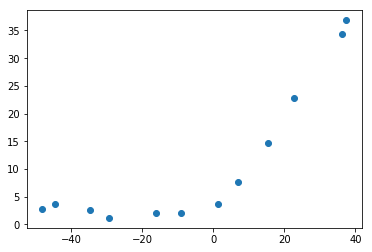

In [3]:
#Постройте график, где по осям откладываются X и y из обучающей выборки.

pyplot.scatter(x, y)
pyplot.show()

In [4]:
#Реализуйте функцию стоимости потерь для линейной регрессии с L2-регуляризацией.

def h(theta, x):
    return np.dot(theta, x.T)

def costWithL2(theta, x, y, lmbda):
    prediction = h(theta, x)
    difference = prediction - y.squeeze()
    sqareDifference = sum(difference ** 2)
    l2Parameter = lmbda * sum(theta ** 2)
    return (sqareDifference + l2Parameter) / (2*len(y))

def getExtendedData(x, y):
    extendedX = np.hstack((np.ones((len(x), 1)), x))
    theta = np.ones(extendedX.shape[1])
    return extendedX, theta
    

extendedX, theta = getExtendedData(x, y)
lmbda = 1
cost = costWithL2(theta, extendedX, y, lmbda)
print(cost)

304.034858887


In [5]:
#Реализуйте функцию градиентного спуска для линейной регрессии с L2-регуляризацией.

def gradientDescentWithL2(theta, x, y, lmbda):
    predictions = h(theta, x)
    gradient = np.dot(x.T, (predictions - y))
    regularization = lmbda * theta
    return (gradient + regularization) / len(y)

gradient = gradientDescentWithL2(theta, extendedX, y, lmbda)
print(gradient)

[ -15.21968234  598.25074417]


In [6]:
#Постройте модель линейной регрессии с коэффициентом регуляризации 0 и постройте график полученной функции
#совместно с графиком из пункта 2. 
#Почему регуляризация в данном случае не сработает?

theta = optimize.minimize(costWithL2, theta, (extendedX, y, 0), method='CG').x
print(theta)

[ 13.08773879   0.36777194]


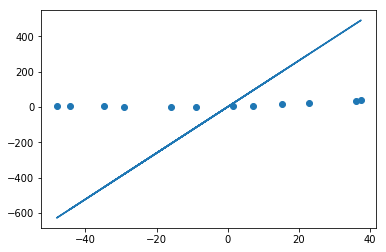

In [7]:
def lineValue(x, theta):
    return x*theta[0] + theta[1]

pyplot.scatter(x, y)
pyplot.plot(x, lineValue(x, theta))
# pyplot.axis((-60,40,0,50))
pyplot.show()

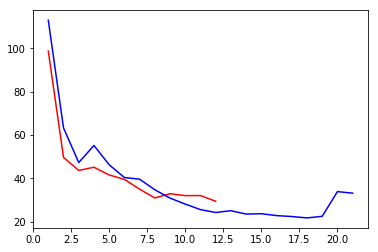

In [8]:
#Постройте график процесса обучения (learning curves) для обучающей и валидационной выборки. 
#По оси абсцисс откладывается число элементов из обучающей выборки, а по оси ординат - ошибка 
#(значение функции потерь) для обучающей выборки (первая кривая) и валидационной выборки (вторая кривая).
#Какой вывод можно сделать по построенному графику?

def plotLearningCurves(theta, x, y, lmbda, color="r"):
    counts = []
    costs = []
    
    for iterationIndex in range(len(x)):
        sliceValue = iterationIndex+1
        counts.append(sliceValue)
        theta = optimize.minimize(costWithL2, theta, (x, y, 0), method='CG').x
        cost = costWithL2(theta, x[:sliceValue], y[:sliceValue], lmbda)
        costs.append(cost)
        
    pyplot.plot(counts, costs, c=color)

extendedXValidation, thetaValidation = getExtendedData(xValidation, yValidation)

plotLearningCurves(theta, extendedX, y, lmbda, "r")
plotLearningCurves(thetaValidation, extendedXValidation, yValidation, lmbda, "b")

pyplot.show()

In [9]:
#Реализуйте функцию добавления p - 1 новых признаков в обучающую выборку (X2, X3, X4, …, Xp).

def addNewParameters(x, count):
    exist = x.squeeze()
    newParameters = np.zeros((len(x), count-1))
    return np.hstack((x, newParameters))

newX = addNewParameters(x, 2)
print(newX)

[[-15.93675813   0.        ]
 [-29.15297922   0.        ]
 [ 36.18954863   0.        ]
 [ 37.49218733   0.        ]
 [-48.05882945   0.        ]
 [ -8.94145794   0.        ]
 [ 15.30779289   0.        ]
 [-34.70626581   0.        ]
 [  1.38915437   0.        ]
 [-44.38375985   0.        ]
 [  7.01350208   0.        ]
 [ 22.76274892   0.        ]]


In [10]:
#Поскольку в данной задаче будет использован полином высокой степени, 
#то необходимо перед обучением произвести нормализацию признаков.

#Xnorm = (X - Xmin) / (Xmax - Xmin)

def normalize(x):
    m, n = x.shape
   
    for columnIndex in range(n):
        column = x[:,columnIndex]
        minValue, maxValue = min(column), max(column)
        denominator = maxValue - minValue if (maxValue - minValue) != 0 else 1
        normalizeColumn = (column - minValue) / denominator
        x[:,columnIndex] = normalizeColumn
    return x

normalize(newX)


array([[ 0.3754727 ,  0.        ],
       [ 0.22098919,  0.        ],
       [ 0.98477355,  0.        ],
       [ 1.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.45724029,  0.        ],
       [ 0.74068813,  0.        ],
       [ 0.15607721,  0.        ],
       [ 0.57799411,  0.        ],
       [ 0.04295764,  0.        ],
       [ 0.64373673,  0.        ],
       [ 0.8278286 ,  0.        ]])

In [11]:
#Обучите модель с коэффициентом регуляризации 0 и p = 8.

def model(x, lmbda=0, p=8):
    newX = addNewParameters(x, 8)
    normalize(newX)
    extendedNewX, newTheta = getExtendedData(newX, y)
    
    # gradient = gradientDescentWithL2(newTheta, extendedNewX, y, lmbda)
    # print(gradient)

    newTheta = optimize.minimize(costWithL2, newTheta, (extendedNewX, y, lmbda), method='CG').x
    return extendedNewX, newTheta
    
newX, theta = model(x)

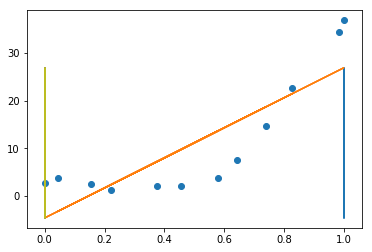

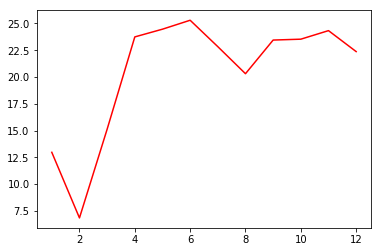

In [12]:
#Постройте график модели, совмещенный с обучающей выборкой, а также график процесса обучения. 
#Какой вывод можно сделать в данном случае?

def plotModelAndLearningCurves(theta, x, y, lmbda=0):
    pyplot.scatter(x[:, 1], y)
    pyplot.plot(x, h(theta, x))
    pyplot.show()

    plotLearningCurves(theta, x, y, lmbda)
    pyplot.show()
    
plotModelAndLearningCurves(theta, newX, y)

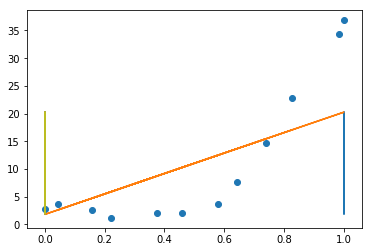

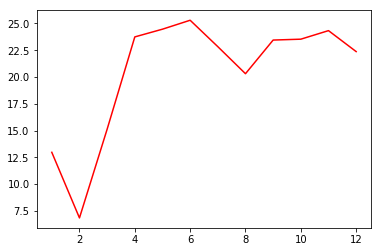

In [13]:
#Постройте графики из пункта 10 для моделей с коэффициентами регуляризации 1 и 100. Какие выводы можно сделать?

newX, theta = model(x, lmbda=1)
plotModelAndLearningCurves(theta, newX, y)

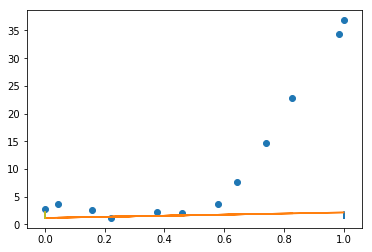

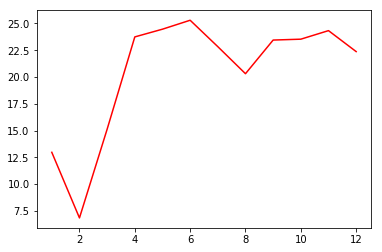

In [14]:
newX, theta = model(x, lmbda=100)
plotModelAndLearningCurves(theta, newX, y)

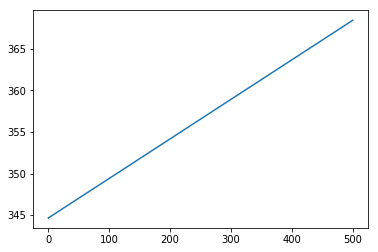

In [15]:
#С помощью валидационной выборки подберите коэффиент регуляризации, который позволяет достичь наименьшей ошибки. 
#Процесс подбора отразите с помощью графика (графиков).

lmbdaValues = [500, 250, 100, 1, 0.5, 0, 0.01, 0.0001, 0.0000001]

costs = []

for lmbda in lmbdaValues:
    x, theta = getExtendedData(xValidation, yValidation)
    cost = costWithL2(theta, x, yValidation, lmbda)
    costs.append(cost)
    
pyplot.plot(lmbdaValues, costs)
pyplot.show()
    


In [16]:
#Вычислите ошибку (потерю) на контрольной выборке.

xResult, thetaResult = getExtendedData(xTest, yTest)
thetaResult = optimize.minimize(costWithL2, thetaResult, (xResult, yTest, 0), method='CG').x
cost = costWithL2(thetaResult, xResult, yTest, lmbda)
print(cost)


30.1205372978


In [17]:
#Ответы на вопросы представьте в виде отчета.